# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as st

geo_data_0=pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1=pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2=pd.read_csv('/datasets/geo_data_2.csv')

Посмотрим на данные 

In [146]:
geo_data_0.head()
geo_data_0.info()
geo_data_1.info()
geo_data_2.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8

Типы данных корректные, пропусков нет.

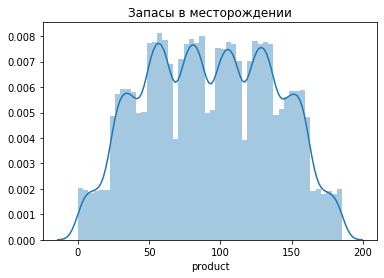

In [147]:
sns.distplot(geo_data_0['product']).set_title('Запасы в месторождении');

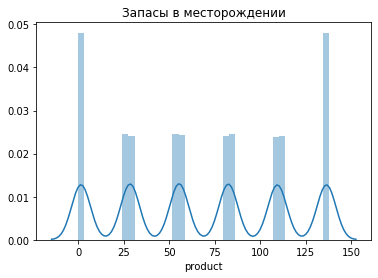

In [148]:
sns.distplot(geo_data_1['product']).set_title('Запасы в месторождении');

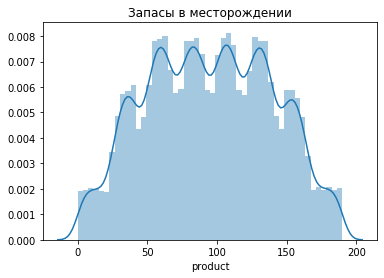

In [149]:
sns.distplot(geo_data_2['product']).set_title('Запасы в месторождении');

Очевидно, что распределение не будет нормальным, т.к. по условию необходимо использовать технику Bootstrap, а не t-критерий Стьюдента

## Обучение и проверка модели

In [150]:
def model (data):
    
    features = data.drop(["product","id"], axis=1)
    target = data["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=1)
    scaler = MinMaxScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    lr = LinearRegression(normalize=False)
    lr.fit(features_train, target_train)
    predictions = lr.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    average_product = sum(predictions) / len(predictions)
    
    print("RMSE: {0:.2f}".format(rmse))
    print("Average product: {0:.2f}".format(average_product))
    
    return (predictions, target_valid.reset_index(drop=True), rmse);

In [151]:
i = 1
for region in [geo_data_0, geo_data_1, geo_data_2]:
    print(f"Region {i}:")
    print("\n---------")
    split_and_train(region)
    print("-----------------------\n\n")
    i+=1

Region 1:

---------
RMSE: 37.74
Average product: 92.49


(0        122.077150
 1         59.962649
 2        103.766210
 3         75.190233
 4        117.368716
             ...    
 24995     68.830939
 24996     88.219557
 24997     27.716347
 24998     78.842095
 24999     88.993643
 Length: 25000, dtype: float64,
 0         89.929339
 1         94.203721
 2        123.553649
 3         83.166422
 4        146.285652
             ...    
 24995     33.898039
 24996     58.019701
 24997     54.531967
 24998    133.316523
 24999    136.725031
 Name: product, Length: 25000, dtype: float64,
 37.74258669996437)

-----------------------


Region 2:

---------
RMSE: 0.89
Average product: 69.12


(0         81.760894
 1         -0.087805
 2         54.756918
 3        108.366828
 4         54.402051
             ...    
 24995     27.753786
 24996    138.042638
 24997      0.481605
 24998     84.341551
 24999     -0.491241
 Length: 25000, dtype: float64,
 0         80.859783
 1          0.000000
 2         53.906522
 3        107.813044
 4         53.906522
             ...    
 24995     26.953261
 24996    137.945408
 24997      0.000000
 24998     84.038886
 24999      0.000000
 Name: product, Length: 25000, dtype: float64,
 0.8943375629130565)

-----------------------


Region 3:

---------
RMSE: 39.87
Average product: 94.96


(0         97.207831
 1         73.693815
 2         89.225341
 3         59.603718
 4        149.768631
             ...    
 24995    125.395072
 24996     80.496583
 24997     78.752028
 24998     91.344872
 24999     98.416795
 Length: 25000, dtype: float64,
 0        102.734478
 1         72.411400
 2         27.076410
 3         53.209936
 4        112.650597
             ...    
 24995     79.891012
 24996     54.943838
 24997     56.660575
 24998    152.305382
 24999    179.789770
 Name: product, Length: 25000, dtype: float64,
 39.86671127773423)

-----------------------




In [152]:
predictions_1, validation_1, rmse_1 = split_and_train(geo_data_0)
predictions_2, validation_2, rmse_2 = split_and_train(geo_data_1)
predictions_3, validation_3, rmse_3 = split_and_train(geo_data_2)

RMSE: 37.74
Average product: 92.49
RMSE: 0.89
Average product: 69.12
RMSE: 39.87
Average product: 94.96


## Подготовка к расчёту прибыли

In [153]:
budget = 10**10 
income_per_barrel = 450*10**3

In [154]:
n = budget / income_per_barrel
print("Точка безубыточности: {0:.0f} тыс. баррелей".format(n))

Точка безубыточности: 22222 тыс. баррелей


In [155]:
print("Средний объем сырья в скважине для безубыточного функционирования: ", np.ceil(n/200), 'тыс. баррелей')

Средний объем сырья в скважине для безубыточного функционирования:  112.0 тыс. баррелей


In [156]:
def profit_1(predictions, target):
    top_preds = predictions.sort_values(ascending=False)
    top_target = target[top_preds.index][:200]
    revenue = top_target.sum() * income_per_barrel
    return revenue - budget

Среднего объёма сырья недостаточно для безубыточного функционирования во всех трех регионах.

## Расчёт прибыли и рисков 

In [157]:
state = np.random.RandomState(27)

In [158]:
def find_conf_interval_and_loss_risk(predictions, target):
    revenue = []
    for _ in range(1000):
        target_sample = target.sample(500, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        revenue.append(profit_1(predictions_sample, target_sample)) 
        
    lower = int(np.percentile(revenue, 2.5))
    higher = int(np.percentile(revenue, 97.5))
    mean_revenue = int(sum(revenue) / len(revenue))
    risk = st.percentileofscore(revenue, 0)

    return ((lower, higher), mean_revenue, risk)

In [159]:
i = 1
for preds, target in zip([predictions_1, predictions_2, predictions_3], 
                         [validation_1, validation_2, validation_3]):
    interval, mean_revenue, risk = find_conf_interval_and_loss_risk(preds, target)
    print(f"Region {i}:")
    print("\n-----------------------------------------")
    print(f"Mean: {mean_revenue}")
    print(f"95% confidence interval: {interval}")
    print(f"Risk of loss: {risk}")
    print("-----------------------------------------\n\n")
    i+=1

Region 1:

-----------------------------------------
Mean: 452571996
95% confidence interval: (-85673815, 1010169611)
Risk of loss: 5.2
-----------------------------------------


Region 2:

-----------------------------------------
Mean: 535637442
95% confidence interval: (113694425, 983574641)
Risk of loss: 0.7
-----------------------------------------


Region 3:

-----------------------------------------
Mean: 432152101
95% confidence interval: (-107220715, 940085441)
Risk of loss: 6.2
-----------------------------------------




Заданную условием задачи вероятность убытков меньше 2.5% можно достичь только в регионе 2. Также во втором регионе самое высокое среднее значение прибыли и отсутствуют убыточные значения в доверительном интервале.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован